In [2]:
import random
import pprint
import types
import numpy as np
import pandas as pd
# from  more_itertools import unique_everseen
import lsh_func
from IPython.core.debugger import Tracer
from collections import defaultdict
from operator import itemgetter
# from pylab import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

import l2_hash_family
import cosine_hash_family
import lsh_tester
import lsh_index

from lsh_index import LSHIndex
from l2_hash_family import L2HashFamily
from cosine_hash_family import CosineHashFamily
from lsh_tester import LSHTester

In [3]:
# create random 3D unit vector

d = 3
num_points = 10000
points = []
for _ in xrange(num_points):
    points.append(list(lsh_func.random_three_vector()))
# pprint.pprint(points)


In [4]:
# initical random projection vector
k = 32 # num of projection
l = 32 # of hash table
hfamily = CosineHashFamily(d)
lsh = LSHIndex(hfamily, k, l)

# print ("")
# print ("lsh.dict:")
# pprint.pprint(lsh.__dict__)
# print ("")
# print ("lsh.hash_family.dict:")
# pprint.pprint(lsh.hash_family.__dict__)
# print ("")
# print ("lsh.hash_table[1][0]:")
# pprint.pprint(lsh.hash_tables[1][0])
# print ("")
# print ("lsh.hash_table[0][0][0].dict:")
# pprint.pprint(lsh.hash_tables[0][0][0].__dict__)

# print ("")
# get random vector in object
t_array = []
for g, table in lsh.hash_tables:
    v_array = []
    for v in g:
        v_array.append(v.r)
    t_array.append(v_array)
# pprint.pprint(t_array)

print ("")
print ("Random Vector:")
t_df = pd.DataFrame(t_array).T
# pprint.pprint(t_df)



Random Vector:


In [5]:
# hash points with random projection vector

hash_table_array = []
p_array = []
for p in points:
    p_array.append(p)
hash_table_array.append(p_array)

print ("")
for g,table in lsh.hash_tables: 
    h_array = []
    for ix, p in enumerate(points):
        hash_value = lsh.hash(g,p)
        h_array.append(hash_value)
        point_hash = (p, hash_value)
#         print point_hash
    hash_table_array.append(h_array)

# pprint.pprint(hash_table_array)

# print ("")
# print ("hash value:")
hash_table_df = pd.DataFrame(hash_table_array).T
# pprint.pprint(hash_table_df)

# print ("")
# print hash_table_df[2][0]


In [10]:
neighbor_array = []
q_index = 5436
# for i in range(1,len(hash_table_df.columns)):
for i in range(1,4):
    neighbor_df = hash_table_df[(hash_table_df[i] == hash_table_df[i][q_index])]
#     pprint.pprint(neighbor_df)
    neighbor_array = neighbor_array + neighbor_df[0].values.tolist()
    
# print hash_table_df[0][1980]
print len(neighbor_array)

264


In [11]:
# np points array
p_array = np.asarray(points)
# np neighbor array
n_array = np.asarray(neighbor_array)

p_lat_array = np.array(np.arcsin(p_array[:,2])) * 180 / np.pi
p_long_array = np.array(np.arctan2(p_array[:,1], p_array[:,0])) * 180 / np.pi

n_lat_array = np.array(np.arcsin(n_array[:,2])) * 180 / np.pi
n_long_array = np.array(np.arctan2(n_array[:,1], n_array[:,0])) * 180 / np.pi

# pprint.pprint(p_long_array)
# pprint.pprint(n_array)
# pprint.pprint(n_array[:,2])

<IPython.core.display.Javascript object>


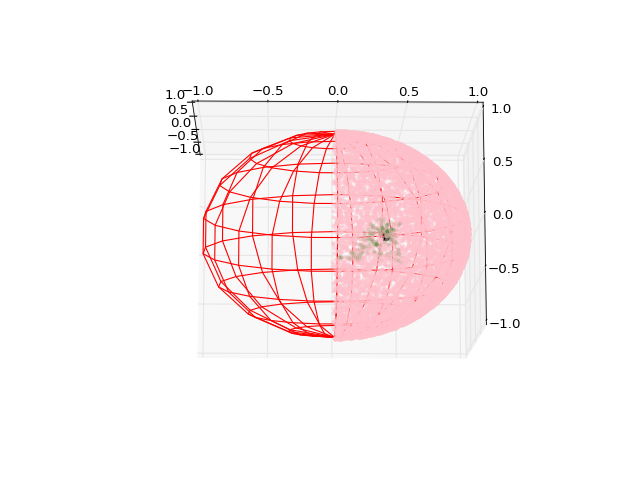

(-1, 1)

In [14]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')

# draw points
ax.plot(p_array[:,0],p_array[:,1],p_array[:,2], '.', color='pink', zorder=1, alpha=0.5)

# draw neighbor points
ax.plot(n_array[:,0],n_array[:,1],n_array[:,2], '.', color='green', zorder=2, alpha=0.05)

# draw query point
ax.scatter(p_array[q_index,0],p_array[q_index,1],p_array[q_index,2], color="black", s=120, zorder=10)

#draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax.plot_wireframe(x, y, z, color="r")

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])

<IPython.core.display.Javascript object>


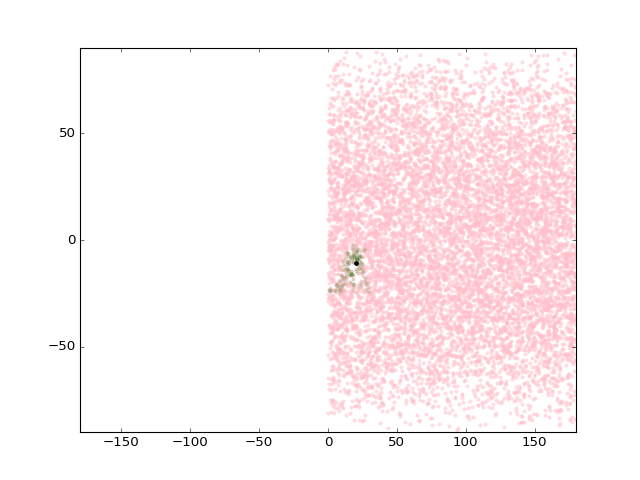

(-90, 90)

In [13]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca()

# draw points
ax.plot(p_long_array, p_lat_array,'.', color='pink', zorder=1, alpha=0.5)

# draw neighbor points
ax.plot(n_long_array, n_lat_array,'.', color='green', zorder=2, alpha=0.05)

# draw query point
ax.scatter( p_long_array[q_index], p_lat_array[q_index], color="black", s=10, zorder=3)

ax.set_xlim([-180,180])
ax.set_ylim([-90,90])